## Meranie programátorských zručností pomocou kognitívnych testov - dátová analýza
### 1. Načítanie dát a knižníc
Najskôr si načítame knižnice, ktoré potrebujeme pre prácu s dátami a samotné dáta z .csv súboru.

In [100]:
#import libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import PowerTransformer

#load data
df_results_all = pd.read_csv("data.csv")

Rozdelíme dáta na programátorské a neprogramátorské

In [101]:
df_results_pro = df_results_all[df_results_all["programming_experience"] == 1]
df_results_nopro = df_results_all[df_results_all["programming_experience"] == 0]

In [102]:
print(df_results_pro.describe())
print(df_results_nopro.describe())

          gender        age       mood  programming_experience       mark  \
count  86.000000  86.000000  86.000000                    86.0  86.000000   
mean    1.151163  27.848837   1.209302                     1.0   2.279070   
std     0.420572   8.003701   0.652890                     0.0   1.252303   
min     0.000000  18.000000   0.000000                     1.0   1.000000   
25%     1.000000  22.000000   1.000000                     1.0   1.250000   
50%     1.000000  24.500000   1.000000                     1.0   2.000000   
75%     1.000000  32.000000   2.000000                     1.0   3.000000   
max     2.000000  54.000000   2.000000                     1.0   6.000000   

           skill  independence  motivation  experience_length  activity_1  \
count  86.000000     86.000000   86.000000          86.000000   86.000000   
mean    1.860465      2.779070    2.383721           5.279070    3.631500   
std     0.935104      0.639874    0.688880           2.481229    0.536941  

### 2. Základný opis a charakteristiky dát
Ukážka datasetu

In [103]:
df_results_pro.tail()

,gender,age,mood,programming_experience,mark,skill,independence,motivation,experience_length,activity_1,activity_2,activity_3,activity_4,activity_5
96,1,22,1,1,2,1,3,3,6,3.806,4.372,4.268,5.000,3.445
103,1,43,1,1,4,1,3,2,1,3.422,3.788,3.475,3.414,3.414
104,2,32,1,1,3,3,3,2,6,3.523,3.929,5.000,4.268,2.682
105,1,32,2,1,2,2,3,3,8,3.150,3.137,4.268,3.262,2.591
109,1,35,1,1,2,2,3,3,8,3.945,3.933,4.146,4.237,3.353


Počet dát

In [104]:
print("Only programmers data:", df_results_pro.shape[0])
print("Only no-programmers data:", df_results_nopro.shape[0])

Only programmers data: 86
Only no-programmers data: 26


Typy atribútov  
Tu vidíme, že dáta sú kompletné, teda nemusíme riešiť chýbajúce dáta.

In [105]:
#types of attributes
print(df_results_pro.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 1 to 109
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  86 non-null     int64  
 1   age                     86 non-null     int64  
 2   mood                    86 non-null     int64  
 3   programming_experience  86 non-null     int64  
 4   mark                    86 non-null     int64  
 5   skill                   86 non-null     int64  
 6   independence            86 non-null     int64  
 7   motivation              86 non-null     int64  
 8   experience_length       86 non-null     int64  
 9   activity_1              86 non-null     float64
 10  activity_2              86 non-null     float64
 11  activity_3              86 non-null     float64
 12  activity_4              86 non-null     float64
 13  activity_5              86 non-null     float64
dtypes: float64(5), int64(9)
memory usage: 10.1 

In [106]:
print(df_results_nopro.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 111
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  26 non-null     int64  
 1   age                     26 non-null     int64  
 2   mood                    26 non-null     int64  
 3   programming_experience  26 non-null     int64  
 4   mark                    26 non-null     int64  
 5   skill                   26 non-null     int64  
 6   independence            26 non-null     int64  
 7   motivation              26 non-null     int64  
 8   experience_length       26 non-null     int64  
 9   activity_1              26 non-null     float64
 10  activity_2              26 non-null     float64
 11  activity_3              26 non-null     float64
 12  activity_4              26 non-null     float64
 13  activity_5              26 non-null     float64
dtypes: float64(5), int64(9)
memory usage: 3.0 K

Deskriptívne štatistiky ako sú počet, priemer, minimá a maximá...

In [107]:
df_results_pro.describe()

,gender,age,mood,programming_experience,mark,skill,independence,motivation,experience_length,activity_1,activity_2,activity_3,activity_4,activity_5
count,86.000000,86.000000,86.000000,86.0,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,1.151163,27.848837,1.209302,1.0,2.279070,1.860465,2.779070,2.383721,5.279070,3.631500,3.981709,4.298872,3.780791,2.961058
std,0.420572,8.003701,0.652890,0.0,1.252303,0.935104,0.639874,0.688880,2.481229,0.536941,0.382600,0.588524,0.653969,0.654194
min,0.000000,18.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,1.189000,2.307000,2.164000,2.012000,1.554000
25%,1.000000,22.000000,1.000000,1.0,1.250000,1.000000,3.000000,2.000000,4.000000,3.323000,3.820750,4.146000,3.391500,2.591000
50%,1.000000,24.500000,1.000000,1.0,2.000000,2.000000,3.000000,2.000000,5.000000,3.758000,4.102000,4.268000,3.536000,2.758500
75%,1.000000,32.000000,2.000000,1.0,3.000000,2.750000,3.000000,3.000000,8.000000,4.016500,4.239750,5.000000,4.229500,3.445000
max,2.000000,54.000000,2.000000,1.0,6.000000,3.000000,3.000000,3.000000,8.000000,4.333000,4.397000,5.000000,5.000000,4.176000


In [108]:
df_results_nopro.describe()

,gender,age,mood,programming_experience,mark,skill,independence,motivation,experience_length,activity_1,activity_2,activity_3,activity_4,activity_5
count,26.000000,26.000000,26.000000,26.0,26.0,26.0,26.0,26.0,26.0,26.000000,26.000000,26.000000,26.000000,26.000000
mean,1.307692,26.653846,1.230769,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,3.638500,4.054269,4.340615,3.931346,2.863038
std,0.549125,9.046291,0.514408,0.0,0.0,0.0,0.0,0.0,0.0,0.477371,0.274198,0.413330,0.659684,0.700683
min,0.000000,17.000000,0.000000,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.953000,3.347000,3.536000,2.682000,1.493000
25%,1.000000,21.250000,1.000000,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,3.342000,3.846000,4.153500,3.421750,2.355000
50%,1.000000,23.000000,1.000000,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,3.799500,4.130500,4.252500,4.146000,2.743000
75%,2.000000,29.000000,1.750000,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,3.971750,4.259500,4.268000,4.237000,3.368750
max,2.000000,53.000000,2.000000,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.251000,4.383000,5.000000,5.000000,4.237000


Distribúcia dát  
Pozrieme sa na distribúciu dát vo všetkých stĺpcoch, aby sme vedeli, ktoré atribúty má najväčší význam sledovať (ktorých rozdelenie má nejakú výpovednú hodnotu)  
Stĺpce, ktoré budú mať hodnoty sústredené na jednom mieste, nebudeme uvažovať, keďže nám toho veľa nepovedia.

V stĺpci s vekom máme síce najviac zastúpených študentov (18-25 rokov), avšak sú tu aj staršie vekové kategórie, takže tento stĺpec môžeme uvažovať ako stĺpec s výpovednou hodnotou.

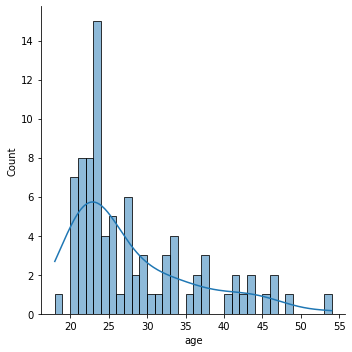

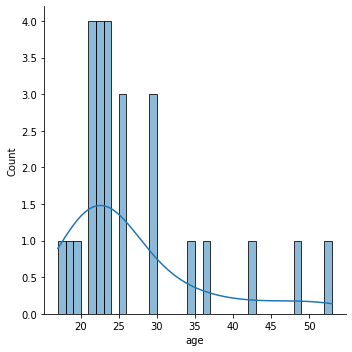

In [109]:
sns.displot(data=df_results_pro, x="age", kde=True, binwidth=1)
sns.displot(data=df_results_nopro, x="age", kde=True, binwidth=1)

Stĺpec so známkami z programovania má dobrú distribúciu.

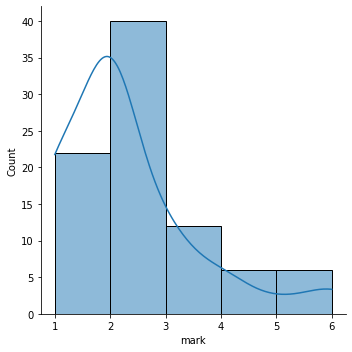

In [110]:
sns.displot(data=df_results_pro, x="mark", kde=True, binwidth=1)

Stĺpec zručnosti programátora.

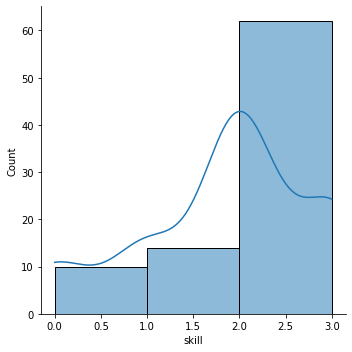

In [111]:
sns.displot(data=df_results_pro, x="skill", kde=True, binwidth=1)

Stĺpec samostatnosti pri programovaní je skoro jednohlasný, preto ho v predspracovaní údajov vystrihneme a ďalej nebudeme uvažovať.

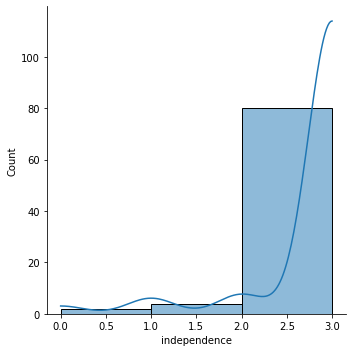

In [112]:
sns.displot(data=df_results_pro, x="independence", kde=True, binwidth=1)

Stĺpec vyjadrujúci motiváciu programátorov má tak isto nežiadúcu distribúciu, preto ho nebudeme uvažovať.

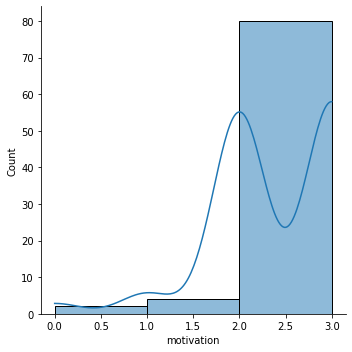

In [113]:
sns.displot(data=df_results_pro, x="motivation", kde=True, binwidth=1)

Stĺpec s dĺžkou skúsenosti s programovaním má dobré rozdelenie.

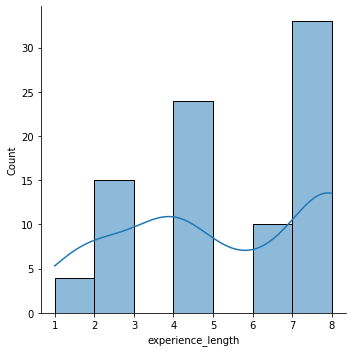

In [114]:
sns.displot(data=df_results_pro, x="experience_length", kde=True, binwidth=1)

Stĺpce s výsledkami aktivít majú taktiež prijateľnú distribúciu.

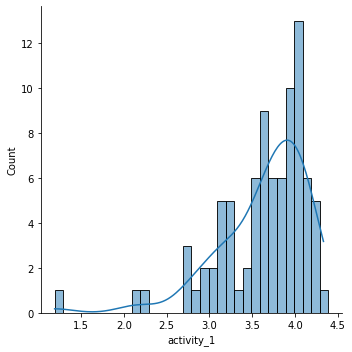

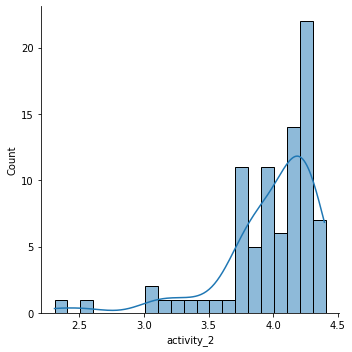

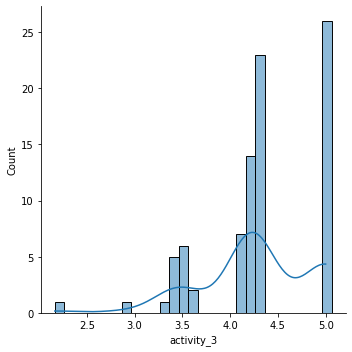

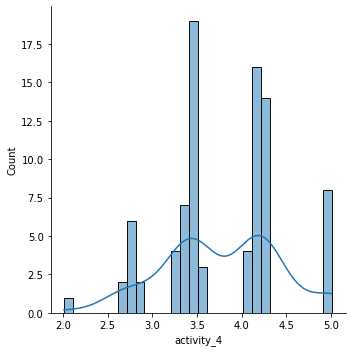

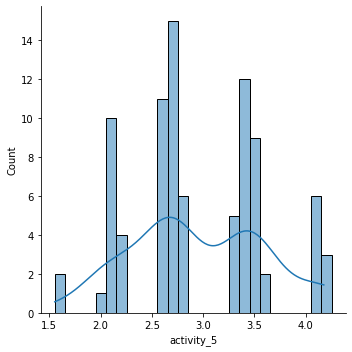

In [115]:
sns.displot(data=df_results_pro, x="activity_1", kde=True, binwidth=0.1)
sns.displot(data=df_results_pro, x="activity_2", kde=True, binwidth=0.1)
sns.displot(data=df_results_pro, x="activity_3", kde=True, binwidth=0.1)
sns.displot(data=df_results_pro, x="activity_4", kde=True, binwidth=0.1)
sns.displot(data=df_results_pro, x="activity_5", kde=True, binwidth=0.1)

Porovnáme výsledky programátorov s neprogramátormi a ďalej budeme pracovať len s dátami od programátorov.

In [116]:
print("{: ^15} {: ^15}".format("Programmers",  "Non-programmers"))
print("{: ^15} {: ^15}activity_1".format(df_results_pro.mean().activity_1.round(3), df_results_nopro.mean().activity_1.round(3)))
print("{: ^15} {: ^15}activity_2".format(df_results_pro.mean().activity_2.round(3), df_results_nopro.mean().activity_2.round(3)))
print("{: ^15} {: ^15}activity_3".format(df_results_pro.mean().activity_3.round(3), df_results_nopro.mean().activity_3.round(3)))
print("{: ^15} {: ^15}activity_4".format(df_results_pro.mean().activity_4.round(3), df_results_nopro.mean().activity_4.round(3)))
print("{: ^15} {: ^15}activity_5".format(df_results_pro.mean().activity_5.round(3), df_results_nopro.mean().activity_5.round(3)))

  Programmers   Non-programmers
     3.632           3.638     activity_1
     3.982           4.054     activity_2
     4.299           4.341     activity_3
     3.781           3.931     activity_4
     2.961           2.863     activity_5


Vykonáme t-test dvoch vzoriek medzi programátormi a neprogramátormi, aby sme zistili, či sú signifikantne odlišní.

In [117]:
a = df_results_pro[["activity_1", "activity_2", "activity_3", "activity_4", "activity_5", "age"]].to_numpy()
b = df_results_nopro[["activity_1", "activity_2", "activity_3", "activity_4", "activity_5", "age"]].to_numpy()
stats.ttest_ind(a=a, b=b)

Ttest_indResult(statistic=array([-0.05968917, -0.89849623, -0.33691447, -1.02660106,  0.6585505 ,
        0.6470239 ]), pvalue=array([0.9525115 , 0.37088358, 0.73682334, 0.30686057, 0.51156052,
       0.51896439]))

Z výsledkov porovnania vidíme, že rozdiely medzi programátormi a neprogramátormi nie je markantný. Taktiež p-hodnoty v t-teste vyšli dostatočne vysoké (väčšie ako 0.05) na to, aby sme neprikladali signifikantnú váhu rozdielom medzi programátormi a neprogramátormi.

### 3. Predspracovanie dát

Najskôr sa zbavíme nepotrebných stĺpcov (a taktiež stĺpcov s minimálnou výpovednou hodnotou).

In [118]:
df_results_pro.pop("gender")
df_results_pro.pop("programming_experience")
df_results_pro.pop("independence")
df_results_pro.pop("motivation")
df_results_pro

,age,mood,mark,skill,experience_length,activity_1,activity_2,activity_3,activity_4,activity_5
1,22,1,2,2,6,3.049,4.120,4.207,4.176,3.506
2,22,1,1,2,2,3.761,3.060,5.000,4.268,2.835
3,20,2,1,2,4,4.097,3.899,4.268,2.682,2.713
4,24,1,2,3,8,4.152,4.110,5.000,4.085,4.176
5,20,2,2,1,2,3.028,4.090,4.237,3.445,2.591
...,...,...,...,...,...,...,...,...,...,...
96,22,1,2,1,6,3.806,4.372,4.268,5.000,3.445
103,43,1,4,1,1,3.422,3.788,3.475,3.414,3.414
104,32,1,3,3,6,3.523,3.929,5.000,4.268,2.682
105,32,2,2,2,8,3.150,3.137,4.268,3.262,2.591


Následne transformujeme dáta pomocou mocninovej transformácie (power transform), vďaka čomu by mali naše dáta viacej pripomínať normálne (gaussove) rozdelenie, čo je vhodnejšie pre následnú analýzu. Taktiež nám to preškáluje dáta, čo vidíme aj na grafoch nižšie.

Index(['age', 'mood', 'mark', 'skill', 'experience_length', 'activity_1',
       'activity_2', 'activity_3', 'activity_4', 'activity_5'],
      dtype='object')


C:\Users\Marek\AppData\Local\Temp\ipykernel_4456\285532869.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results_pro[cols] = transformer.fit_transform(df_results_pro[cols])


,age,mood,mark,skill,experience_length,activity_1,activity_2,activity_3,activity_4,activity_5
1,-0.797506,-0.354795,0.030392,0.062945,0.305970,-1.288493,0.224806,-0.273071,0.602453,0.847973
2,-0.797506,-0.354795,-1.411861,0.062945,-1.337912,0.068317,-1.938429,1.318336,0.746026,-0.157945
3,-1.438584,1.243156,-1.411861,0.062945,-0.502274,1.077547,-0.609799,-0.165997,-1.672470,-0.349007
4,-0.301380,-0.354795,0.030392,1.339419,1.095475,1.271223,0.179916,1.318336,0.460806,1.787889
5,-1.438584,1.243156,0.030392,-0.998816,-1.337912,-1.316002,0.092358,-0.220717,-0.524647,-0.542878


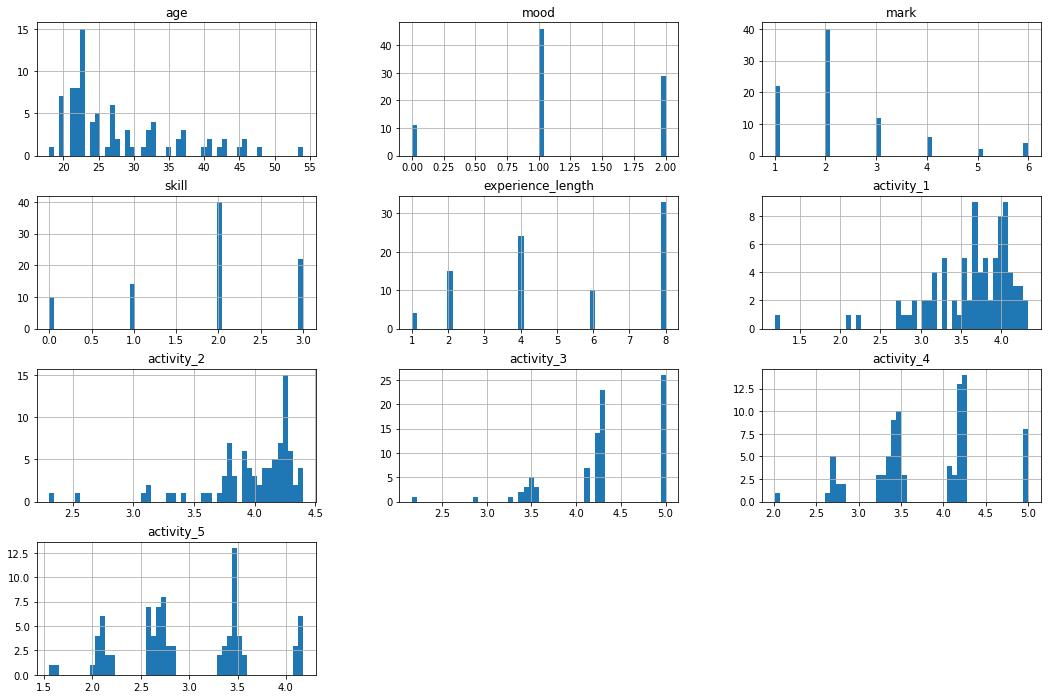

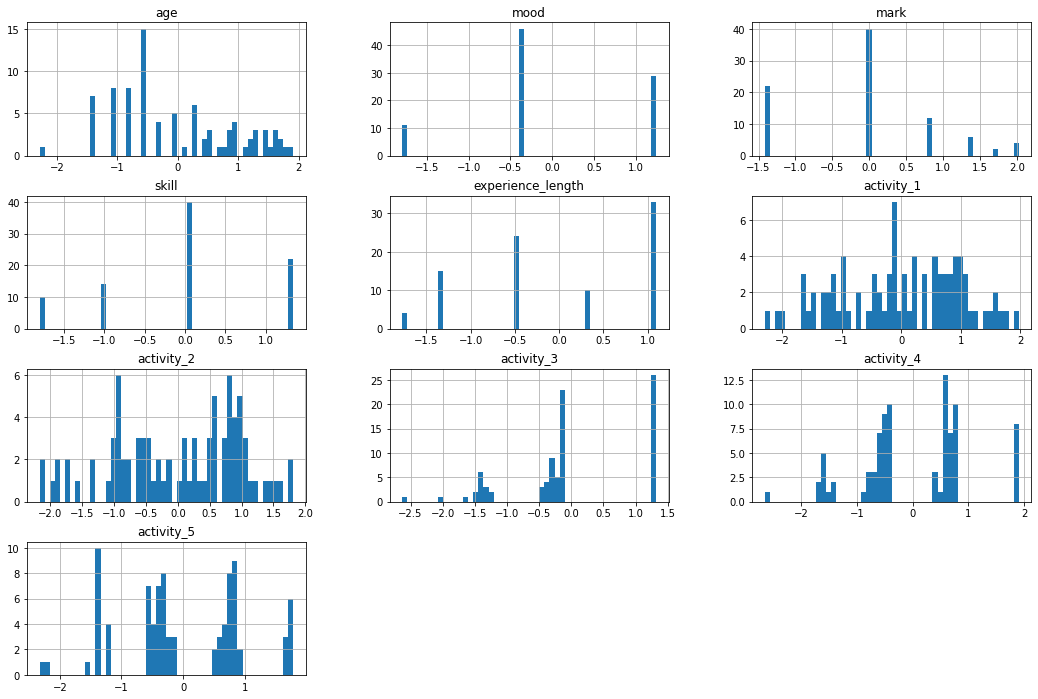

In [119]:
df_results_pro.hist(figsize=(18, 12), bins=50)
transformer = PowerTransformer(method="yeo-johnson")
cols = df_results_pro.columns
print(cols)
df_results_pro[cols] = transformer.fit_transform(df_results_pro[cols])
df_results_pro.hist(figsize=(18, 12), bins=50)

df_results_pro.head()

Teraz odstránime vychýlené hodnoty (hodnoty, ktoré sú markantne odlišné oproti ostatným) pomocou metódy smerodajnej odchýlky. Pomocou odchýlky a priemeru si spravíme "výsek", mimo ktorého všetky hodnoty zahodíme. Túto metódu vykonáme nad stĺpcami s kognitívnimi aktivitami (keďže participant mohol mať napríklad problémy len pri jednej aktivite a podobne). Odstránenie vychýlených hodnôt robíme hlavne z dôvodu, že niekto mohol mať pri plnení aktivít zlý internet, podvádzať alebo ho to jednoducho prestalo baviť.

In [120]:
for i in df_results_pro.columns:
    #exclude columns
    if i in ["mood", "age", "mark", "skill", "experience_length"]:
        continue
    mean = df_results_pro[i].mean()
    std = df_results_pro[i].std()

    cut = std * 2.5
    low_limit = mean - cut
    up_limit = mean + cut 
    print("Limits for outliers in column", i, "are: ", low_limit, up_limit)
    print("Number of data with outliers in column", i, df_results_pro.shape[0])
    df_results_pro = df_results_pro[(df_results_pro[i] > low_limit) & (df_results_pro[i] < up_limit)]
    print("Number of data without outliers in column", i, df_results_pro.shape[0], "\n")

Limits for outliers in column activity_1 are:  -2.5146628823293007 2.5146628823293007
Number of data with outliers in column activity_1 86
Number of data without outliers in column activity_1 86 

Limits for outliers in column activity_2 are:  -2.5146628823293007 2.5146628823293007
Number of data with outliers in column activity_2 86
Number of data without outliers in column activity_2 86 

Limits for outliers in column activity_3 are:  -2.5146628823293007 2.5146628823293007
Number of data with outliers in column activity_3 86
Number of data without outliers in column activity_3 85 

Limits for outliers in column activity_4 are:  -2.5088238309403175 2.528817063414867
Number of data with outliers in column activity_4 85
Number of data without outliers in column activity_4 84 

Limits for outliers in column activity_5 are:  -2.3861965195708517 2.474967255048147
Number of data with outliers in column activity_5 84
Number of data without outliers in column activity_5 84 



Spojíme hodnoty z dotazníku do jedného "programátorského skóre" a taktiež hodnoty z aktivít do "kognitívneho skóre".

In [121]:
#calculate programming score
df_results_pro["programming_score"] = (df_results_pro["mark"] + df_results_pro["skill"]) / 2

#calculate cognitive score (also to be in range of 0-1)
df_results_pro["cognitive_score"] = (df_results_pro["activity_1"] + df_results_pro["activity_2"] + df_results_pro["activity_3"] + df_results_pro["activity_4"] + df_results_pro["activity_5"]) / 5

df_results_pro.describe()
#df_results_pro.corr()

,age,mood,mark,skill,experience_length,activity_1,activity_2,activity_3,activity_4,activity_5,programming_score,cognitive_score
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,-0.001929,0.025578,0.016446,-0.016695,-0.007062,-0.005110,0.033774,0.035774,0.041691,0.044385,-0.000124,0.030103
std,1.017468,0.997598,1.005904,1.007075,1.009255,1.015929,0.990307,0.974661,0.970016,0.972233,0.515654,0.562210
min,-2.287582,-1.793723,-1.411861,-1.800159,-1.771780,-2.285436,-2.166420,-2.032218,-1.716940,-2.214584,-1.205338,-1.600501
25%,-0.797506,-0.354795,-0.330171,-0.998816,-0.502274,-0.921022,-0.787339,-0.299232,-0.571880,-0.542878,-0.217035,-0.378647
50%,-0.301380,-0.354795,0.030392,0.062945,-0.098152,0.060555,0.202361,-0.165997,0.013458,-0.253133,0.046668,0.101631
75%,0.898848,1.243156,0.838780,0.382063,1.095475,0.822233,0.831237,1.318336,0.697607,0.759409,0.046668,0.534866
max,1.913333,1.243156,2.025019,1.339419,1.095475,1.972186,1.811524,1.318336,1.900965,1.787889,1.352753,1.097742


### 4. Výsledky
Pozrime sa na absolútne hodnoty korelácií (sústredíme sa teraz na silu korelácie [svetlé hodnoty na heatmape], nie na to, či je korelácia priama/nepriama)

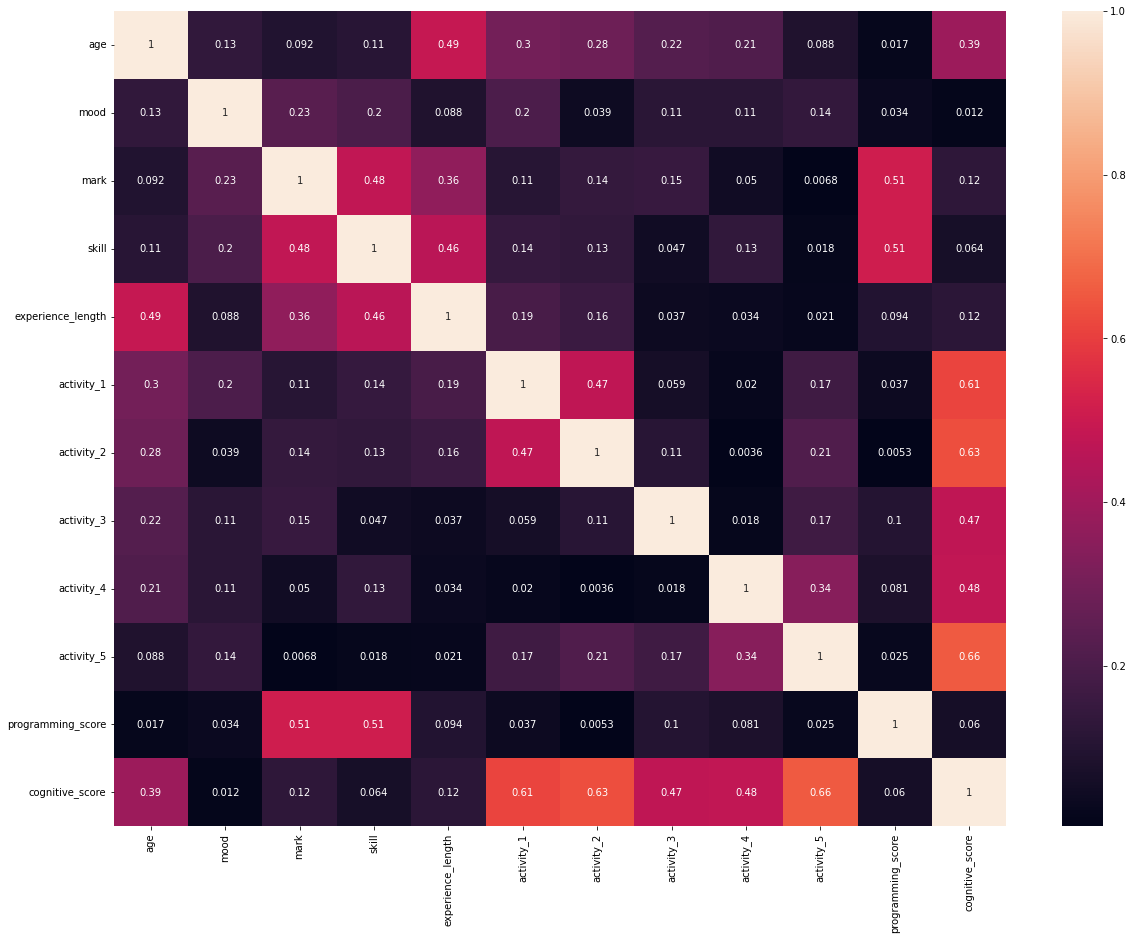

In [122]:
#korelacie
df_results_pro.corr()
plt.subplots(figsize=(20,15))
dataplot = sns.heatmap(abs(df_results_pro.corr()), annot=True)

Z heatmapy vidíme, že vek nám pekne koreluje s niektorými aktivitami. Pomocou grafov sa pozrieme, či sú tieto korelácie kladné alebo záporné.

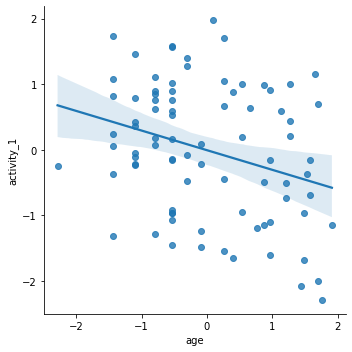

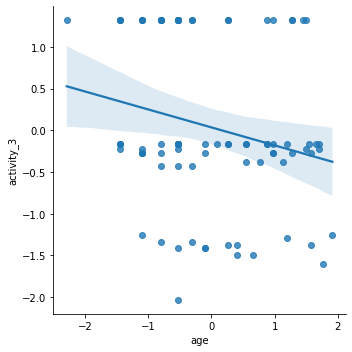

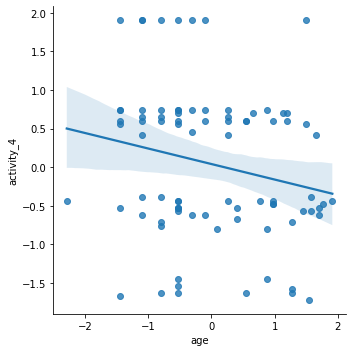

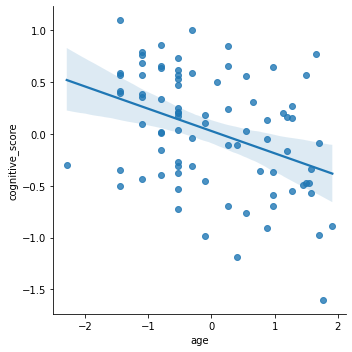

In [123]:
sns.lmplot(x="age", y="activity_1", data=df_results_pro)
sns.lmplot(x="age", y="activity_3", data=df_results_pro)
sns.lmplot(x="age", y="activity_4", data=df_results_pro)
sns.lmplot(x="age", y="cognitive_score", data=df_results_pro)

Všetky sú zaporné, teda s pribúdajúcim vekom mali participanti v našich aktivitách nižšie skóre. To podporujú aj iné výskumy, ktoré hovoria, že s pribúdajúcim vekom naše kognitívne funkcie oslabujú. Je teda pravdepodobné, že našim kognitívnym aktivitám sa úspešne podarilo namerať kognitívne funckie participantov.

### Lineárna regresia

Lineárnou regresiou otestujeme závislosť programátorských zručností od kognitívnych funkcií. Aby sme vedeli reprezentovať výsledky regresie, stanovíme si nulovú hypotézu a ku nej alternatívnu hypotézu.  
Nulová hypotéza:  
*"Kognitívne funkcie nemajú pozitívnu závislosť s programátorskou zručnosťou."*  
Alternatívna hypotéza:  
*"Kognitívne funkcie majú pozitívnu závislosť s programátorskou zručnosťou."*  
Pre testovanie týchto hypotéz využijeme p hodnotu ktorú dostaneme pomocou lineárnej regresie medzi relevantnými údajmi z programátorského dotazníku (stĺpce "skill" a "mark") a výsledkami kognitívnych aktivít.

In [124]:
y = df_results_pro["mark"]
x = df_results_pro[["activity_1","activity_2","activity_3","activity_4","activity_5", "cognitive_score"]]

x = sm.add_constant(x)

linear_regression = sm.OLS(y, x).fit()

print(linear_regression.summary())
print(linear_regression.pvalues)

                            OLS Regression Results                            
Dep. Variable:                   mark   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.7124
Date:                Fri, 13 May 2022   Prob (F-statistic):              0.616
Time:                        19:53:37   Log-Likelihood:                -117.31
No. Observations:                  84   AIC:                             246.6
Df Residuals:                      78   BIC:                             261.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0217      0.111     

Teraz skúsime použiť stĺpec "skill".

In [125]:
y = df_results_pro["skill"]
x = df_results_pro[["activity_1","activity_2","activity_3","activity_4","activity_5", "cognitive_score"]]

x = sm.add_constant(x)

linear_regression = sm.OLS(y, x).fit()

print(linear_regression.summary())
print(linear_regression.pvalues)

                            OLS Regression Results                            
Dep. Variable:                  skill   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.7511
Date:                Fri, 13 May 2022   Prob (F-statistic):              0.588
Time:                        19:53:37   Log-Likelihood:                -117.31
No. Observations:                  84   AIC:                             246.6
Df Residuals:                      78   BIC:                             261.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0140      0.111     

Keďže všetky p hodnoty sú väčšie ako 0.05, podporuje to, že pri zopakovaní experimentu by sme dosiahli iné výsledky, čo znamená, že závislosti, ktoré sme namerali, môžu byť náhodné. Toto naznačuje, že nulová hypotéza by mohla byť pravdivá. Treba však podotknúť, že hypotéza je platná len pre naše dáta. Najmenšia p hodnota bola pri aktivite 4, ktorá patrí medzi aktivity zamerané na pamäť.  
  
Na záver si vyskúšame stanoviť ešte jednu dvojicu hypotéz.  
Nulová hypotéza:  
*"Vek nevplýva na výkonnosť kognitívnych funkcií."*  
Alternatívna hypotéza:  
*"Vek vplýva na výkonnosť kognitívnych funkcií."*  
Následne znovu overíme tieto hypotézy pomocou lineárnej regresie.

In [126]:
y = df_results_pro["age"]
x = df_results_pro[["activity_1","activity_2","activity_3","activity_4","activity_5", "cognitive_score"]]

x = sm.add_constant(x)

linear_regression = sm.OLS(y, x).fit()

print(linear_regression.summary())
print(linear_regression.pvalues)

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     3.969
Date:                Fri, 13 May 2022   Prob (F-statistic):            0.00293
Time:                        19:53:37   Log-Likelihood:                -110.62
No. Observations:                  84   AIC:                             233.2
Df Residuals:                      78   BIC:                             247.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0166      0.103     

Z výsledkov vidíme, že p hodnota je nižšia ako 0.05 v stĺpci s aktivitou 4 (aktivita zameraná na pamäť) a taktiež v stĺpci s celkovým kognitívnym skóre. To naznačuje, že vplyv týchto aktivít na vek nie je náhodný a potvrdzujeme, že vek vplýva na výkonnosť kognitívnych funkcií.

V nasledujúcej časti vyskúšame predikovať vek participantov podľa ich dosiahnutého skóre v kognitívnych aktivitách. Aby sme vedeli povedať, ako presne vieme predikovať vek (o koľko rokov sa budeme v priemere mýliť), musíme si najskôr upraviť dáta do pôvodného stavu (vykonať inverznú transformáciu).

In [127]:
df_results_pro = df_results_pro.drop(['cognitive_score', 'programming_score'], axis=1)
cols = df_results_pro.columns

arr_results_pro = transformer.inverse_transform(df_results_pro)
#returned array so we need to make dataframe again
df_results_pro = pd.DataFrame(arr_results_pro, columns = cols)

df_results_pro

,age,mood,mark,skill,experience_length,activity_1,activity_2,activity_3,activity_4,activity_5
0,22.0,1.0,2.0,2.0,6.0,3.049,4.120,4.207,4.176,3.506
1,22.0,1.0,1.0,2.0,2.0,3.761,3.060,5.000,4.268,2.835
2,20.0,2.0,1.0,2.0,4.0,4.097,3.899,4.268,2.682,2.713
3,24.0,1.0,2.0,3.0,8.0,4.152,4.110,5.000,4.085,4.176
4,20.0,2.0,2.0,1.0,2.0,3.028,4.090,4.237,3.445,2.591
...,...,...,...,...,...,...,...,...,...,...
79,22.0,1.0,2.0,1.0,6.0,3.806,4.372,4.268,5.000,3.445
80,43.0,1.0,4.0,1.0,1.0,3.422,3.788,3.475,3.414,3.414
81,32.0,1.0,3.0,3.0,6.0,3.523,3.929,5.000,4.268,2.682
82,32.0,2.0,2.0,2.0,8.0,3.150,3.137,4.268,3.262,2.591


Použijeme stratégiu "leave 1 out", pri ktorej vždy jeden záznam necháme ako testovací a na všetkých ostatných natrénujeme model. Tento proces zopakujeme pre všetky záznamy a chyby spriemerujeme. Táto stratégia je vhodná pre menšie datasety, keďže je výpočtovo náročnejšia.

Average error: 5.881
count    84.000000
mean      5.880952
std       4.571796
min       0.000000
25%       3.000000
50%       5.000000
75%       8.000000
max      22.000000
dtype: float64


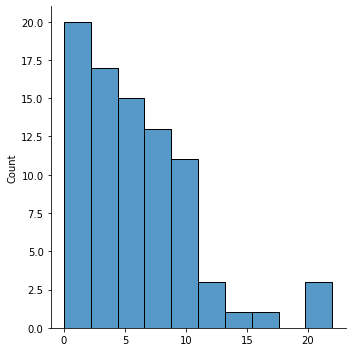

In [128]:
results = []
df_results_pro = sm.add_constant(df_results_pro)
df_results_pro.insert(0, "loo_id", range(len(df_results_pro)))
#print(df_results_pro)

for i in range(len(df_results_pro)):
    #data preparation
    df_train = df_results_pro[df_results_pro["loo_id"] != i]
    df_test = df_results_pro[df_results_pro["loo_id"] == i]
    correct_value = round(df_test["age"].iloc[0], 3)
    df_test = df_test[["activity_1", "activity_2", "activity_3", "activity_4", "activity_5", "const"]]

    #linear regression
    y = df_train["age"]
    x = df_train[["activity_1", "activity_2", "activity_3", "activity_4", "activity_5", "const"]]
    linear_regression = sm.OLS(y, x).fit()

    #prediction and result
    singleResult = round(linear_regression.predict(df_test).iloc[0], 3)
    err = round(abs(singleResult - correct_value))

    #print("\nPrediction:", singleResult, "\nCorrect:", correct_value, "\nDifference:", err, 3)
    results.append(err)
    
print("Average error:", round(sum(results) / len(results), 3))

descriptive = pd.Series(results)
print(descriptive.describe())
sns.displot(descriptive)

Náš model dokáže predikovať vek na základe výsledkov z aktivít s priemernou odchýlkou 5.88 roka. Štandardná odchýlka je 4.57.

### 5. Zistenia, limitácie a odporúčania pre budúci výskum

- Nepodarilo sa nám nájsť veľkú koreláciu medzi našimi kognitívnymi aktivitami a programátorským skóre z dotazníku.
  - Budúcemu výskumu odporúčame viacej sa sústrediť na zmeranie programátorských zručností, či už pomocou aktivít alebo programátorského testu.
- Výsledky našich kognitívnych aktivít sú v zápornej korelácií s vekom participantov, z čoho usudzujeme, že správne zachytávajú užívateľove kognitívne funkcie (keďže je dokázané, že s pribúdajúcim vekom sú kognitívne funkcie slabšie)
  - Odporúčame využívať podobné aktivity na zmeranie kognitívnych funkcií (obzvlášť aktivity č.3 a č.4, ktoré boli zamerané na krátkodobú pamäť)
- Participanti mali lepšie skóre v aktivite č.2 oproti aktivite č.1, ktorá mala byť ľahšia (obsahovala len 2 farby). Vysvetľujeme si to tak, že užívateľom nejakú dobu trvá, kým si na danú aktivitu zvyknú.
  - Neodporúčame hodnotiť užívateľov na základe prvých pokusov v danej aktivite, keďže ich skóre môže byť ovplyvnené tým, že sa danú aktivitu "učia".
  - Napriek tomu, že v našich aktivitách sme prvé 2 kolá nerátali do výsledku, "ťažšia" aktivita stále dopadla lepšie.
  - Tento problém sa vyskytol len v aktivitách, kde sa počítalo skóre podľa času.
- Pamäťové aktivity dosahovali vyššiu koreláciu s programátorskou zručnosťou.